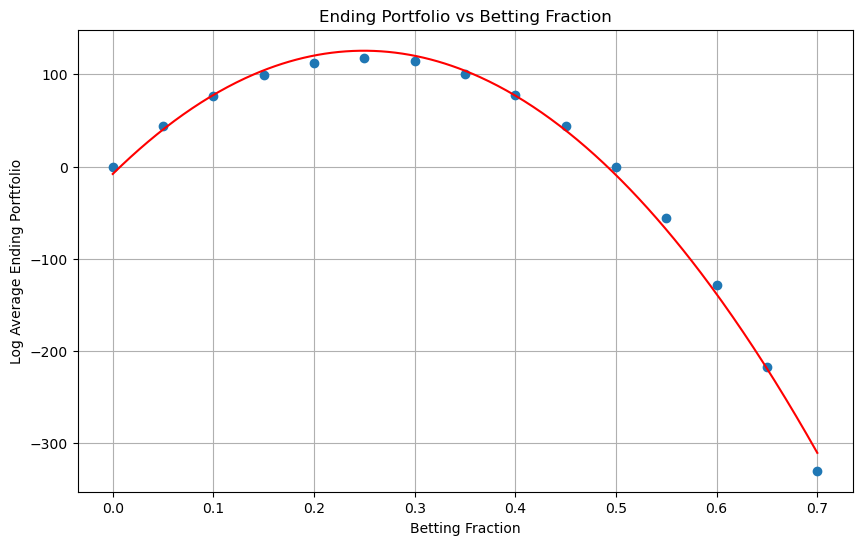

In [339]:
import numpy as np
import matplotlib.pyplot as plt

# coin logic

n_simulations=1000
initial_bankroll=1
n_bets=2000

# Odds And Payouts
p=0.5
b=2

# Simulation function
def run_simulation(fraction):
    final_bankrolls = []
    bankroll = initial_bankroll
    for _ in range(n_bets):
        bet_size = fraction * bankroll
        if np.random.rand() < p:
            bankroll += bet_size * b
        else:
            bankroll -= bet_size
    return bankroll



# Variables for tracking the highest return and optimal fraction
highest_return = 0
opt_fraction = 0
x_axis = []
y_axis = []


# Simulation across different betting fractions
for i in range(15):
    fraction = i / 20
    average_wealth = 0
    for _ in range(1000):
        average_wealth += np.log(run_simulation(fraction))
    x_axis.append(fraction)
    y_axis.append(average_wealth/1000)
    if average_wealth > highest_return:
        highest_return = average_wealth
        opt_fraction = fraction

        
# Creating curve
degree = 2
coefficients = np.polyfit(x_axis, y_axis, degree)
p_fit = np.poly1d(coefficients)
x_fit = np.linspace(min(x_axis), max(x_axis), 400)
y_fit = p_fit(x_fit)

        
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x_axis, y_axis, 'o', label='Data Points')
plt.plot(x_fit, y_fit, 'r-', label='Polynomial Fit')
plt.title('Ending Portfolio vs Betting Fraction')
plt.xlabel('Betting Fraction')
plt.ylabel('Log Average Ending Porftfolio')
plt.grid(True)
plt.show()

In [340]:
# Find Max
derivative_p = np.polyder(p_fit)
critical_points = np.roots(derivative_p)
critical_points = critical_points[(critical_points >= 0) & (critical_points <= 1)]

# Evaluate polynomial at critical points to find the maximum
max_value = float('-inf')
for point in critical_points:
    value = p_fit(point)
    if value > max_value:
        max_value = value
        opt_fraction = point

print("Optimal Betting Fraction:", opt_fraction)
print("Theoretical Betting Fraction", ((b*p-(1-p))/b))

Optimal Betting Fraction: 0.2494385378533681
Theoretical Betting Fraction 0.25


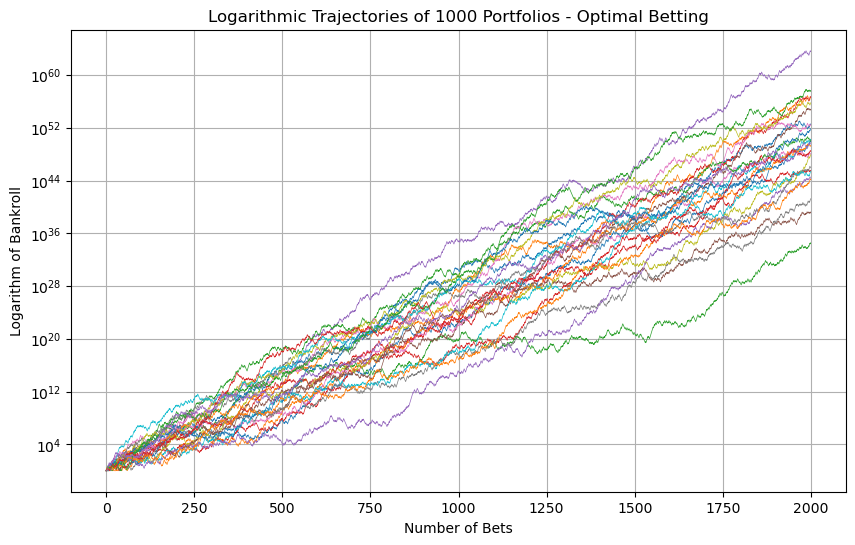

Average Volatility: 0.3746399569483841
Mean Average Ending Wealth: 4.298192831678679e+67


In [357]:
initial_bankroll=1e-50

# Function to simulate multiple bankrolls
def simulate_bankrolls(n_simulations, n_bets, initial_bankroll, f, max_bankroll):
    trajectories = np.zeros((n_simulations, n_bets))
    for i in range(n_simulations):
        bankroll = initial_bankroll
        for j in range(n_bets):
            bet_size = bankroll * f
            result = bet_size * (b if np.random.rand() < p else -1)
            bankroll += result
            bankroll = min(bankroll, max_bankroll)  # Cap the bankroll
            bankroll = max(bankroll, 1)  # Avoid log(0)
            trajectories[i, j] = bankroll
    return trajectories

# Run simulation
optimal_trajectories = simulate_bankrolls(n_simulations, n_bets, initial_bankroll, kelly, max_bankroll)

# Plotting
plt.figure(figsize=(10, 6))
for i in range(25):  # Plotting all might be too dense, plot a subset
    plt.plot(optimal_trajectories[i], linewidth=0.5)
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.title('Logarithmic Trajectories of 1000 Portfolios - Optimal Betting')
plt.xlabel('Number of Bets')
plt.ylabel('Logarithm of Bankroll')
plt.grid(True)
plt.show()

# Calculate returns
returns = (optimal_trajectories[:, 1:] - optimal_trajectories[:, :-1]) / optimal_trajectories[:, :-1]

# Calculate volatility (standard deviation of returns)
volatility = np.std(returns, axis=1)  # Volatility for each simulation
average_volatility = np.mean(volatility)
print("Average Volatility: " + str(average_volatility))

# Calculate the mean average ending wealth
ending_wealth = optimal_trajectories[:, -1]  # Get the last bankroll value from each simulation
mean_ending_wealth = np.mean(ending_wealth)
print("Mean Average Ending Wealth:", mean_ending_wealth)

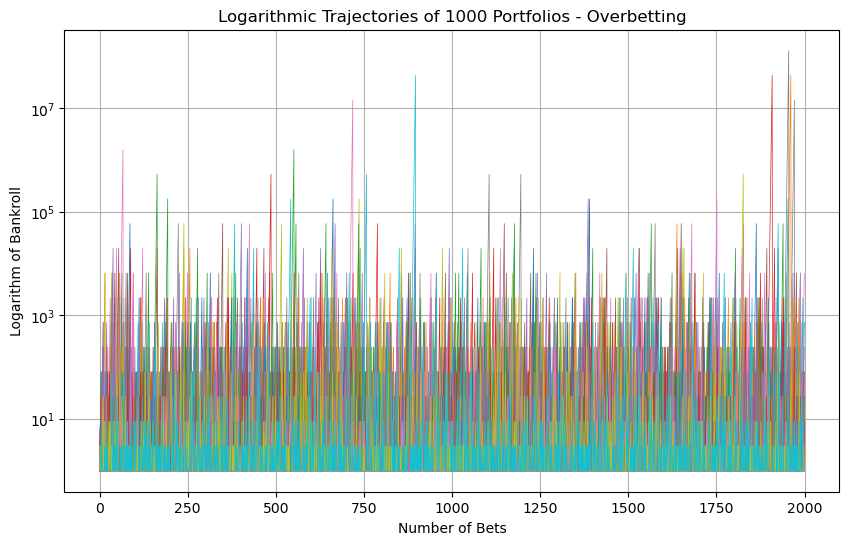

Average Volatility: 1.2343184807463328
Mean Average Ending Wealth: 60.168


In [359]:
# Run simulation for overbetting
overbet_trajectories = simulate_bankrolls(n_simulations, n_bets, initial_bankroll, 1, max_bankroll)

# Plotting
plt.figure(figsize=(10, 6))
for i in range(50):  # Plotting all might be too dense, plot a subset
    plt.plot(overbet_trajectories[i], linewidth=0.5)
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.title('Logarithmic Trajectories of 1000 Portfolios - Overbetting')
plt.xlabel('Number of Bets')
plt.ylabel('Logarithm of Bankroll')
plt.grid(True)
plt.show()

# Calculate returns
returns = (overbet_trajectories[:, 1:] - overbet_trajectories[:, :-1]) / overbet_trajectories[:, :-1]

# Calculate volatility (standard deviation of returns)
volatility = np.std(returns, axis=1)  # Volatility for each simulation
average_volatility = np.mean(volatility)
print("Average Volatility: " + str(average_volatility))

# Calculate the mean average ending wealth
ending_wealth = overbet_trajectories[:, -1]  # Get the last bankroll value from each simulation
mean_ending_wealth = np.mean(ending_wealth)
print("Mean Average Ending Wealth:", mean_ending_wealth)

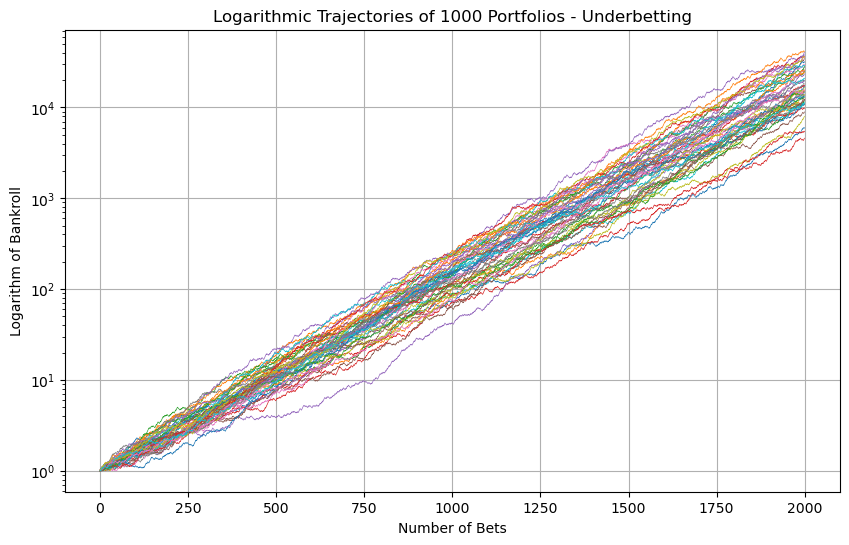

Average Volatility: 0.014990825982566352
Mean Average Ending Wealth: 20950.524234786146


In [360]:
# Run simulation for underbetting
underbet_trajectories = simulate_bankrolls(n_simulations, n_bets, initial_bankroll, 0.01, max_bankroll)

# Plotting
plt.figure(figsize=(10, 6))
for i in range(50):  # Plotting all might be too dense, plot a subset
    plt.plot(underbet_trajectories[i], linewidth=0.5)
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.title('Logarithmic Trajectories of 1000 Portfolios - Underbetting')
plt.xlabel('Number of Bets')
plt.ylabel('Logarithm of Bankroll')
plt.grid(True)
plt.show()

# Calculate returns
returns = (underbet_trajectories[:, 1:] - underbet_trajectories[:, :-1]) / underbet_trajectories[:, :-1]

# Calculate volatility (standard deviation of returns)
volatility = np.std(returns, axis=1)  # Volatility for each simulation
average_volatility = np.mean(volatility)
print("Average Volatility: " + str(average_volatility))

# Calculate the mean average ending wealth
ending_wealth = underbet_trajectories[:, -1]  # Get the last bankroll value from each simulation
mean_ending_wealth = np.mean(ending_wealth)
print("Mean Average Ending Wealth:", mean_ending_wealth)

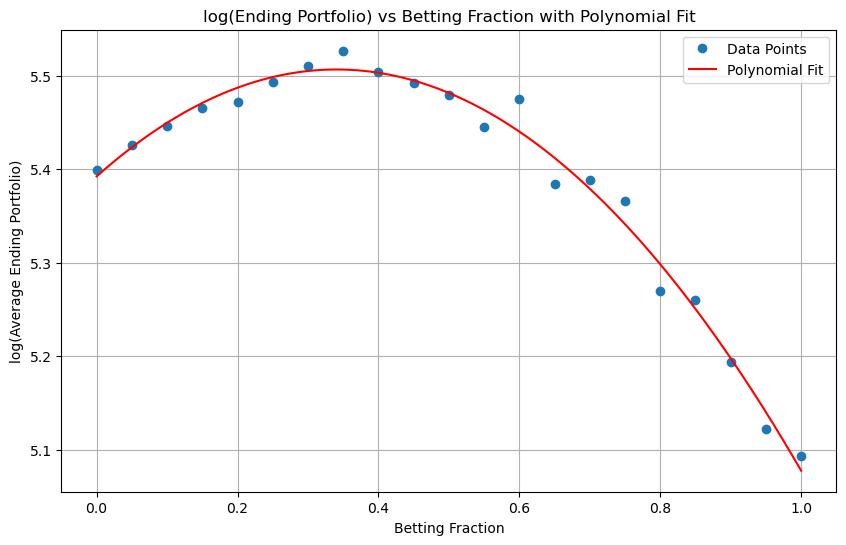

In [344]:
# Stock Logic

# Define stock parameters
mu, sigma, S0 = 0.07, 0.3, 100
rfr = 0.04  # annual risk-free rate

# Simulation function
def single_stock_wealth_path(S0, mu, sigma, days, rfr, fraction):
    wealth = S0
    for i in range(1, days):
        stock_holding = wealth * fraction
        cash_holding = wealth - stock_holding
        cash_holding *= (1 + rfr / 250)
        stock_holding *= 1 + np.random.normal(mu / 250, sigma * np.sqrt(1 / 250))
        wealth = cash_holding + stock_holding
    return wealth


days = 5000
years = 1


# Variables for tracking the highest return and optimal fraction
opt_fraction = 0
high_return = 0
x_axis = []
y_axis = []

# Testing different fractions
for i in range(21):
    fraction = i / 20
    mywealth = 0
    N = 1000
    for j in range(N):
        mywealth += np.log(single_stock_wealth_path(S0, mu, sigma, days, rfr, fraction))
    x_axis.append(fraction)
    average_wealth = mywealth / (N + 1)
    y_axis.append(average_wealth)
    if average_wealth > high_return:
        high_return = average_wealth
        opt_fraction = fraction

# Creating curve
degree = 2
coefficients = np.polyfit(x_axis, y_axis, degree)
p_fit2 = np.poly1d(coefficients)
x_fit = np.linspace(min(x_axis), max(x_axis), 400)
y_fit = p_fit2(x_fit)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_axis, y_axis, 'o', label='Data Points')
plt.plot(x_fit, y_fit, 'r-', label='Polynomial Fit')
plt.title('log(Ending Portfolio) vs Betting Fraction with Polynomial Fit')
plt.xlabel('Betting Fraction')
plt.ylabel('log(Average Ending Portfolio)')
plt.legend()
plt.grid(True)
plt.show()

In [346]:
# Find Max
derivative_p = np.polyder(p_fit2)
critical_points = np.roots(derivative_p)
critical_points = critical_points[(critical_points >= 0) & (critical_points <= 1)]

# Evaluate polynomial at critical points to find the maximum
max_value = float('-inf')
for point in critical_points:
    value = p_fit2(point)
    if value > max_value:
        max_value = value
        opt_fraction = point

# Printing
print("Stock Growth Rate: " + str(mu))
print("Stock Vol: " + str(sigma))
print("Risk Free Rate: " + str(rfr))
print("Optimal Betting Fraction:", str(opt_fraction))
print("Theoretical Kelly Fraction:", str((mu - rfr) / (sigma ** 2)))

Stock Growth Rate: 0.07
Stock Vol: 0.3
Risk Free Rate: 0.04
Optimal Betting Fraction: 0.3404648082687717
Theoretical Kelly Fraction: 0.3333333333333334
